<a href="https://colab.research.google.com/github/riefkiariyanto/PCVK_Genap_2022/blob/main/Final%20Project%20UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import cv2,os

data_path='/content/drive/MyDrive/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to 

In [ ]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [ ]:
np.save('/content/drive/MyDrive/dataset/data',data)
np.save('/content/drive/MyDrive/dataset/target',new_target)

In [ ]:
import numpy as np

data=np.load('/content/drive/MyDrive/dataset/data.npy')
target=np.load('/content/drive/MyDrive/dataset/target.npy')

#loading the save numpy arrays in the previous code

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

#The first CNN layer

#Convolution layer of a kernel size 200
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#The second convolution layer

#Convolution layer of a kernel size 100
model.add(Conv2D(100,(3,3)))
#Relu layer
model.add(Activation('relu'))
#MaxPooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
model.add(Flatten())

#Performing Dropout to avoid overfitting
model.add(Dropout(0.5))

#Dense layer of 64 neurons
model.add(Dense(50,activation='relu'))

#The Final layer with two outputs for two categories
model.add(Dense(2,activation='softmax'))

#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
32/32 [==============================] - 92s 3s/step - loss: 0.7148 - accuracy: 0.5574 - val_loss: 0.6126 - val_accuracy: 0.7012
Epoch 2/20
32/32 [==============================] - 75s 2s/step - loss: 0.5528 - accuracy: 0.7203 - val_loss: 0.4252 - val_accuracy: 0.8008
Epoch 3/20
32/32 [==============================] - 76s 2s/step - loss: 0.4061 - accuracy: 0.8242 - val_loss: 0.3413 - val_accuracy: 0.8645
Epoch 4/20
32/32 [==============================] - 74s 2s/step - loss: 0.2889 - accuracy: 0.8841 - val_loss: 0.2662 - val_accuracy: 0.9163
Epoch 5/20
32/32 [==============================] - 76s 2s/step - loss: 0.2391 - accuracy: 0.9041 - val_loss: 0.2190 - val_accuracy: 0.9323
Epoch 6/20
32/32 [==============================] - 74s 2s/step - loss: 0.1760 - accuracy: 0.9321 - val_loss: 0.1844 - val_accuracy: 0.9442
Epoch 7/20
32/32 [==============================] - 74s 2s/step - loss: 0.1354 - accuracy: 0.9550 - val_loss: 0.1782 - val_accuracy: 0.9402
Epoch 8/20
32/32 [==

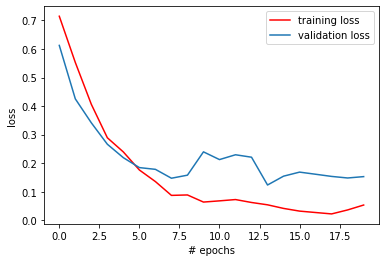

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 498ms/step - loss: 0.0872 - accuracy: 0.9643
[0.08719142526388168, 0.9642857313156128]


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

In [ ]:
model = load_model('/content/model-014.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)
width=int(source.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(source.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer=cv2.VideoWriter("/content/drive/MyDrive/pcvk/outputfile.mp4",cv2.VideoWriter_fourcc(*'DIVX'),20,(width,height))



labels_dict={1:'MASK',0:'NO MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [ ]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Face Mask Detector',img)
    writer.write(img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
source.release()
writer.release()       
cv2.destroyAllWindows()